<a href="https://colab.research.google.com/github/joaovvrodrigues/data-analysis-estrangeiros/blob/main/chegadas_estrangeiros_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chegadas de turistas internacionais de 2010 a 2019**



*   Preparação dos dados
*   Análises gráficas
*   Reconhecimento de padrões



[Download dos datasets](http://dados.turismo.gov.br/index.php/chegada-de-turistas-internacionais)






In [105]:
# http://dados.turismo.gov.br/index.php/chegada-de-turistas-internacionais
# Apartir de 2016 os datasets são organizados de forma diferente, alterando os valores das colunas
# 2018 está usando um enconding diferente
# 2014 está com ';' no final de cada linha (mal formatado)
# Portanto é melhor padronizar as colunas antes de unir
# Estava com problema de enconding, tive que abrir todos os arquivos no sublime e salvar novamente

**Preparação dos dados**

*   Carregando, limpando e formatando dados
*   Concatenando todos



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


colunasRenomeadas = {'Continente':'Continente','Ordem continente':'ID Continente','País':'País', 'Ordem país':'ID País', 'UF':'UF', 'Ordem UF':'ID UF', 'Via de acesso':'Via de acesso', 'Ordem via de acesso':'ID Via de acesso', 'Ano':'Ano', 
                     'Mês':'Mês', 'Ordem mês':'Num mês', 'Chegadas':'Chegadas', 'ano':'Ano', 'cod continente':'ID Continente', 'cod pais':'ID País', 'cod uf':'ID UF', 'Via':'Via de acesso', 'cod via':'ID Via de acesso', 'cod mes':'Num mês',
                     'ï»¿Continente':'Continente', 'PaÃ­s':'País', 'MÃªs':'Mês', 'Pa�s' : 'País', 'Ordem paï¿½s': 'ID País', 'M�s' : 'Mês', 'Ordem mï¿½s' : 'Num mês'}

quantidade = 9 # Quantidade usado para carregar os nomes dos datasets
li = [] # lista com datasets

chegadasPorAno = []

for i in range(10):
    arquivo = "chegadas_201{}.csv".format(i) # Carregando o nome do arquivo atual
    df = pd.read_csv(arquivo, delimiter = ';') # Carregando o DataSet
    
    df.rename(columns=colunasRenomeadas, inplace=True)  # Renomeando as colunas para padronização
    df.dropna(inplace=True) # Remove todos os NaN do DataSet, necenecessário pois temos um numero maior de chegadas pois incluem NaN.

    li.append(df) # Adicionando arquivos na lista de datasets
    
    chegadasPorAno.append(sum(df['Chegadas'])) # Salvando numero total de chegadas por ano

frame = pd.concat(li, axis=0, ignore_index=True) # Concatenando todos os datasets

frame["Mês"] = frame["Mês"].str.lower() # Colocando todos os meses em caixa baixa


Remoção da coluna Unnamed

In [107]:
frame.drop(columns = ['Unnamed: 12'], inplace=True) #Removendo a coluna Unnamed de 2014 Caso use os dados do site oficial, descomente essa linha

**Removendo todas as linhas que o numero de chegadas é igual a zero**

In [108]:
frame_remove = frame.loc[frame['Chegadas'] == 0]
frame = frame.drop(frame_remove.index)

**Descrição do Data Frame unificado**

In [109]:
frame.describe()

,ID Continente,ID País,ID UF,ID Via de acesso,Ano,Num mês,Chegadas
count,129467.000000,129467.000000,129467.000000,129467.000000,129467.000000,129467.000000,129467.000000
mean,4.736558,166.553616,18.612210,1.558304,2014.958321,6.469479,470.626422
std,1.622671,229.046979,18.926776,0.837354,2.854078,3.581264,3540.505094
min,1.000000,2.000000,1.000000,1.000000,2010.000000,1.000000,1.000000
25%,4.000000,54.000000,7.000000,1.000000,2012.000000,3.000000,3.000000
50%,5.000000,114.000000,16.000000,1.000000,2015.000000,6.000000,10.000000
75%,6.000000,182.000000,21.000000,2.000000,2017.000000,10.000000,84.000000
max,8.000000,999.000000,99.000000,4.000000,2019.000000,12.000000,386823.000000


Como realizar uma pesquisa

In [110]:
frame.sort_values(by=['Chegadas'], ascending=False).head() # by=['ID País', 'Chegadas'] Organizar por mais de uma coluna

,Continente,ID Continente,País,ID País,UF,ID UF,Via de acesso,ID Via de acesso,Ano,Mês,Num mês,Chegadas
233449,América do Sul,4,Argentina,11,Rio Grande do Sul,21,Terrestre,2,2017,janeiro,1,386823.0
144169,América do Sul,4,Argentina,11,Rio Grande do Sul,21,Terrestre,2,2015,janeiro,1,353122.0
189925,América do Sul,4,Argentina,11,Rio Grande do Sul,21,Terrestre,2,2016,janeiro,1,350577.0
284808,América do Sul,4,Argentina,11,Rio Grande do Sul,21,Terrestre,2,2018,janeiro,1,307324.0
233542,América do Sul,4,Argentina,11,Rio Grande do Sul,21,Terrestre,2,2017,fevereiro,2,241090.0


Maior número de chegadas em um único mês 

In [111]:
frame[frame['Chegadas'] == 386823] #MUITA GENTE MDS

,Continente,ID Continente,País,ID País,UF,ID UF,Via de acesso,ID Via de acesso,Ano,Mês,Num mês,Chegadas
233449,América do Sul,4,Argentina,11,Rio Grande do Sul,21,Terrestre,2,2017,janeiro,1,386823.0


Instâncias por ano

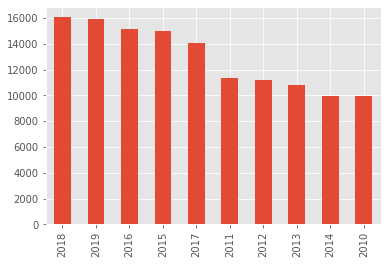

In [112]:
frame['Ano'].value_counts().plot(kind='bar')

Gráfico de número de chegadas por ano, podemos observar uma crescente até 2018

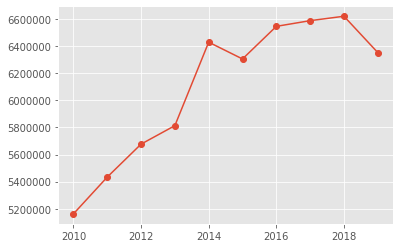

In [113]:
Y = chegadasPorAno
X = frame['Ano'].unique()

plt.plot(X,Y, marker = 'o')
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

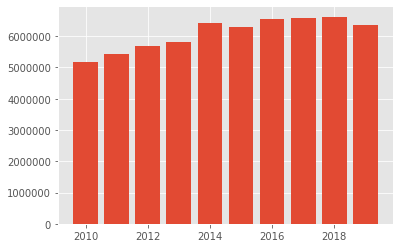

In [114]:
Y = chegadasPorAno
X = frame['Ano'].unique()
plt.bar(X,Y)
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

Gráfico de contagem de continentes no DataFrame, podemos observar que temos muito mais instâncias de 'Europa', logo sendo o continente que mais trouxe estrangeiros.



([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

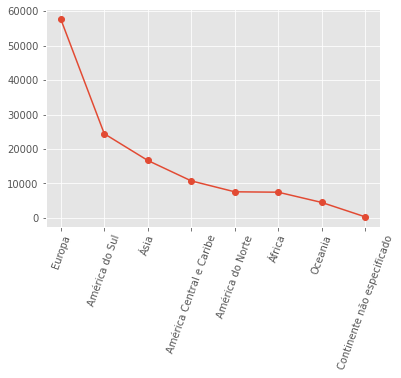

In [115]:
plt.plot(frame['Continente'].value_counts(),marker = 'o')
plt.xticks(rotation = 70)

In [116]:
frame['Continente'].value_counts()

Europa                         57683
América do Sul                 24437
Ásia                           16688
América Central e Caribe       10759
América do Norte                7592
África                          7473
Oceania                         4505
Continente não especificado      330
Name: Continente, dtype: int64

Gráfico de contagem de instâncias de UF no DataFrame, podemos observar que Amazonas é a Unidade Federativa que mais recebeu estrangeiros.

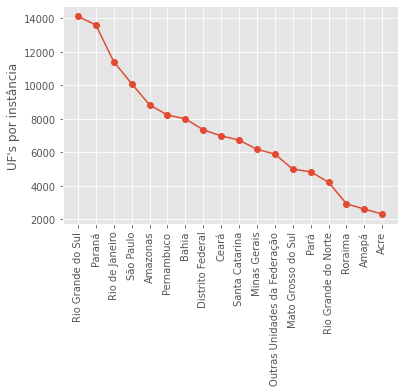

In [117]:
plt.ylabel("UF's por instância")
plt.xticks(rotation = 90)
plt.plot(frame['UF'].value_counts(), marker = 'o')

Text(0, 0.5, "UF's por instância")

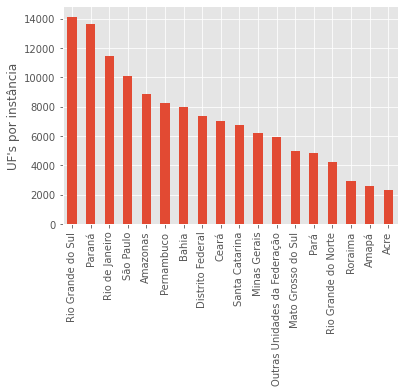

In [118]:
frame['UF'].value_counts().plot(kind='bar')
plt.ylabel("UF's por instância")

Gráfico de contagem de instâncias de Vias de acesso no DataFrame, podemos observar que o meio mais utilizado é viagens aéreas.

Text(0, 0.5, 'Vias de acesso')

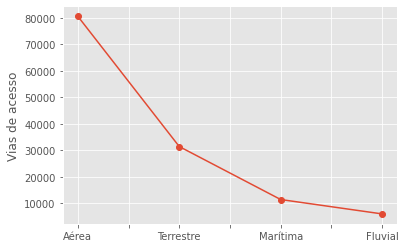

In [119]:
frame['Via de acesso'].value_counts().plot(marker = 'o')
plt.ylabel("Vias de acesso")

Gráfico de contagem de chegadas por meses de todos os anos, podemos observar que recebemos muitos estrangeiros no inicio no ano (Carnaval?). E há uma crescente no meio (junho e julho)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

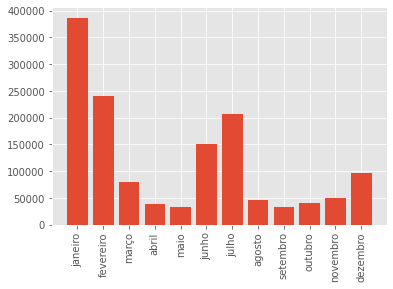

In [120]:
X=frame['Mês']
Y=frame['Chegadas']

plt.bar(X,Y,) # Esse gráfico é muito pesado (quase 5 minutos pra ser gerado)
plt.xticks(rotation = 90)

Chegadas ao longo dos anos em MG

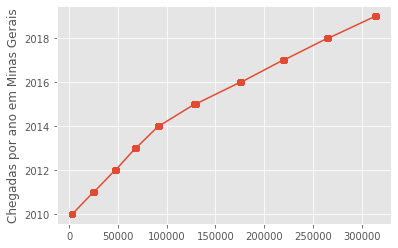

In [121]:
minas = frame[frame['ID UF'] == 13] # Minas Gerais
plt.ylabel("Chegadas por ano em Minas Gerais")
minas['Ano'].plot(marker = 'o')

In [122]:
minas2010 = minas[minas['Ano'] == 2010]
minas2010.sort_values(by=['Chegadas'], ascending=True).head()

,Continente,ID Continente,País,ID País,UF,ID UF,Via de acesso,ID Via de acesso,Ano,Mês,Num mês,Chegadas
3357,Oceania,7,Nova Zelândia,166,Minas Gerais,13,Aérea,1,2010,dezembro,12,2.0
3221,Ásia,5,República da Coreia,184,Minas Gerais,13,Aérea,1,2010,outubro,10,2.0
3220,Ásia,5,Japão,122,Minas Gerais,13,Aérea,1,2010,outubro,10,2.0
3219,Ásia,5,Israel,119,Minas Gerais,13,Aérea,1,2010,outubro,10,2.0
3043,América do Sul,4,Paraguai,173,Minas Gerais,13,Aérea,1,2010,julho,7,2.0


Comparando numero de chegadas de Minas, São Paulo, Rio e Acre



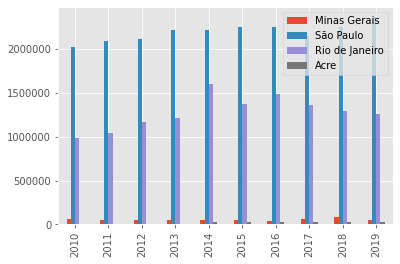

In [123]:
minas = frame[frame['ID UF'] == 13] # Minas Gerais
saopaulo = frame[frame['ID UF'] == 25] # São Paulo
rio = frame[frame['ID UF'] == 19] # Rio de Janeiro
acre = frame[frame['ID UF'] == 1] # Acre

colunas = list(range(2010, 2020))
chegadas = np.random.randint(1, size=(10, 4))

for idx, ano in enumerate(colunas):
   minasAno = minas[minas['Ano'] == ano]
   chegadas[idx][0] = sum(minasAno['Chegadas'])
   
   saopauloAno = saopaulo[saopaulo['Ano'] == ano]
   chegadas[idx][1] = sum(saopauloAno['Chegadas'])
   
   riosAno = rio[rio['Ano'] == ano]
   chegadas[idx][2] = sum(riosAno['Chegadas'])
   
   acreAno = acre[acre['Ano'] == ano]
   chegadas[idx][3] = sum(acreAno['Chegadas'])

df2 = pd.DataFrame(chegadas, columns = ['Minas Gerais', 'São Paulo', 'Rio de Janeiro', 'Acre'], index=colunas)
df2.plot.bar();

plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

Gráfico 'genérico', comparando numero de chegadas de 4 Unidades Federativas



In [124]:
frame['UF'].value_counts()

Rio Grande do Sul               14124
Paraná                          13613
Rio de Janeiro                  11422
São Paulo                       10105
Amazonas                         8841
Pernambuco                       8235
Bahia                            8005
Distrito Federal                 7352
Ceará                            6989
Santa Catarina                   6739
Minas Gerais                     6187
Outras Unidades da Federação     5905
Mato Grosso do Sul               5004
Pará                             4847
Rio Grande do Norte              4223
Roraima                          2936
Amapá                            2617
Acre                             2323
Name: UF, dtype: int64

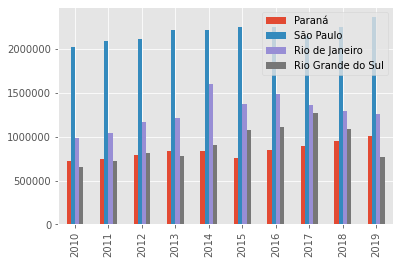

In [125]:
ufs = ['Paraná', 'São Paulo', 'Rio de Janeiro', 'Rio Grande do Sul']

uf1 = frame[frame['UF'] == ufs[0]]
uf2 = frame[frame['UF'] == ufs[1]]
uf3 = frame[frame['UF'] == ufs[2]]
uf4 = frame[frame['UF'] == ufs[3]] 

colunas = list(range(2010, 2020))
chegadas = np.random.randint(1, size=(10, 4))

for idx, ano in enumerate(colunas):
   uf1Ano = uf1[uf1['Ano'] == ano]
   chegadas[idx][0] = sum(uf1Ano['Chegadas'])
   
   uf2Ano = uf2[uf2['Ano'] == ano]
   chegadas[idx][1] = sum(uf2Ano['Chegadas'])
   
   uf3Ano = uf3[uf3['Ano'] == ano]
   chegadas[idx][2] = sum(uf3Ano['Chegadas'])
   
   uf4Ano = uf4[uf4['Ano'] == ano]
   chegadas[idx][3] = sum(uf4Ano['Chegadas'])

df2 = pd.DataFrame(chegadas, columns = ufs, index=colunas)
df2.plot.bar();

plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

Instalando biblioteca Apyori de reconreconhecimento de padrões

In [126]:
!pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=dbd93bc3c5c2bc3afc401db7288402eeed80a6c1bdd326b10320a337775c7817
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


**Extraindo regras: A partir de 2015, as Unidades Federativas que receberam estrangeiros acima da média de 177 pessoas de certo Continente, terá chances de receber visitas de qual outro continente?**

Separando o frame e montando a lista

In [127]:
lista = []
ano = frame[frame['Ano'] > 2014] # Apartir de 2015
ano = ano[ano['Chegadas'] > 177] # Somente os que tiveram chegadas acima da média (177 pessoas)
for i in ano['ID UF'].unique(): # Para cada Unidade Federativa pegar os continentes
    lista.append(list(ano[ano['ID UF'] == i]['Continente'].unique()))

Aplicando apriori na lista e mostrando quantas regras foram obtidas

In [128]:
resultado = list(apriori(lista, min_support=0.01, min_confidence=0.4, min_lift=3, min_length=2))
print("Existem {} relacões derivadas.".format(len(resultado)))

Existem 68 relacões derivadas.


Mostrando as 10 primeiras regras obtidas.

In [129]:
for item in resultado[0:10]: # Somente mostrando 10 primeiras regras de 68
    pair = item[0]
    items = [x for x in pair]
    print("UF's que recebem visitas de " + items[0] + " também tem grandes chances de receber visitas de:  " + ", ".join(items[1:]))

UF's que recebem visitas de América Central e Caribe também tem grandes chances de receber visitas de:  Oceania
UF's que recebem visitas de América Central e Caribe também tem grandes chances de receber visitas de:  África
UF's que recebem visitas de Oceania também tem grandes chances de receber visitas de:  África
UF's que recebem visitas de América Central e Caribe também tem grandes chances de receber visitas de:  Oceania, América do Norte
UF's que recebem visitas de América Central e Caribe também tem grandes chances de receber visitas de:  África, América do Norte
UF's que recebem visitas de América Central e Caribe também tem grandes chances de receber visitas de:  América do Sul, Oceania
UF's que recebem visitas de América Central e Caribe também tem grandes chances de receber visitas de:  América do Sul, África
UF's que recebem visitas de Ásia também tem grandes chances de receber visitas de:  América Central e Caribe, América do Sul
UF's que recebem visitas de América Central 

**Extraindo regras: As Unidades Federativas que receberam estrangeiros acima da média de 177 pessoas por certa Via de Acesso, terá chances de receber visitas de qual outro método?**

Separando o frame e montando a lista

In [130]:
lista = []
ano = frame[frame['Chegadas'] > 177] # Somente os que tiveram chegadas acima da média (177 pessoas)
for i in ano['ID UF'].unique(): # Para cada Unidade Federativa pegar os continentes
    lista.append(list(ano[ano['ID UF'] == i]['Via de acesso'].unique()))

Aplicando apriori na lista e mostrando quantas regras foram obtidas

In [131]:
resultado = list(apriori(lista, min_support=0.01, min_confidence=0.4, min_lift=3, min_length=2))
print("Existem {} relacões derivadas.".format(len(resultado)))

Existem 2 relacões derivadas.


Mostrando as regras obtidas.

In [132]:
for item in resultado[0:10]: # Somente mostrando 10 primeiras regras de 68
    pair = item[0]
    items = [x for x in pair]
    print("UF's que recebem visitas da via de acesso " + items[0] + " também tem grandes chances de receber visitas de modo:  " + ", ".join(items[1:]))

UF's que recebem visitas da via de acesso Fluvial também tem grandes chances de receber visitas de modo:  Terrestre, Marítima
UF's que recebem visitas da via de acesso Marítima também tem grandes chances de receber visitas de modo:  Fluvial, Terrestre, Aérea
